<a href="https://colab.research.google.com/github/Tijae007/DataAnalysisWithR/blob/main/Week_2_Data_Preprocessing_and_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Week 2 Lab: Data Preprocessing and Transformation

Welcome to the Week 2 Lab Session on Linear Regression. This week, we will delve into data Preprocessing steps and expose you to tools and processes to help you process data in meaningful ways. While we may cover a variety of tools, our focus will remain within the `tidy` ecosystem to give you the consistency of tooling that will allow you to connect ideas and build on the next steps.

The outline of the material will focus on:

**1. Importing Data from Multiple Sources**

1.  Importing files from the Web
2.  Importing files from html
3.  Importing Excel Files
4.  Importing Data from a Database

**2. Data Preprocessing and Tranformation**

1.  Data Transformation - Log and Box-Cox Transformations
2.  Handling Missing Data
3.  Data Imputation Techniques

### Importing Data from Multiple Sources

In real-world data science projects, data often comes from multiple sources and formats. Being able to efficiently import and combine data from these various sources is a crucial skill. In this section, we will cover how to import data from common sources such as CSV files, Excel files, databases, and web APIs using the tidyverse and related packages.

<br>

### 1. Reading Data from Weblink

Accessing and importing data directly from a web link is a common task in data science. It allows you to easily access datasets hosted online without having to manually download and save the files. The example below shows how to read a datafile posted from an online link: <https://www.stats.ox.ac.uk/pub/datasets/csb/ch11a.dat>


In [1]:
url = 'https://www.stats.ox.ac.uk/pub/datasets/csb/ch11a.dat'
data = read.csv(url, sep = ' ')

head(data)

,X01,X346,X0840,X36.33,X0
,<int>,<int>,<int>,<dbl>,<int>
1,2,346,850,36.34,0
2,3,346,900,36.35,0
3,4,346,910,36.42,0
4,5,346,920,36.55,0
5,6,346,930,36.69,0
6,7,346,940,36.71,0


### 2. Importing Data from html

To import data from an HTML table, you can use the rvest package, which is part of the tidyverse. The rvest package is designed for web scraping and allows you to extract data from HTML web pages. Here’s how to do it using the example URL provided: <https://www.ssa.gov/oact/babynames/numberUSbirths.html>

In [ ]:
library(rvest)
library(tidyverse)

# URL of the HTML page
url <- "https://www.ssa.gov/oact/babynames/numberUSbirths.html"

# Read the HTML page
webpage <- read_html(url)

# Extract the table from the HTML page
table <- webpage %>%
  html_node("table") %>%
  html_table(fill = TRUE)

# Print the extracted data
head(table)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()         masks stats::filter()
x readr::guess_encoding() masks rvest::guess_encoding()
x dplyr::lag()            masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Year of birth,Male,Female,Total
<int>,<chr>,<chr>,<chr>
1880,"118,399","97,605","216,004"
1881,"108,276","98,855","207,131"
1882,"122,031","115,694","237,725"
1883,"112,475","120,060","232,535"
1884,"122,738","137,585","260,323"
1885,"115,945","141,947","257,892"


### 3. Importing Data from Excel Sheets

Excel sheets are commonly used for storing and analyzing data, making it essential to know how to import Excel files into R for further analysis and modeling. In this tutorial, we will demonstrate how to read Excel files using the readxl package, part of the tidyverse ecosystem.

Installing and Loading the readxl Package

In [ ]:
# installing the readxl package
#install.packages("readxl")

library(readxl)

sample_xl <- readxl_example('datasets.xlsx')
data <- read_excel(sample_xl)
head(data, n = 10)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


### Reading Specific Excel Sheets

If your Excel file contains multiple sheets, you can specify which sheet to read by using the sheet parameter:


In [ ]:
# reading the first sheet
excel_data = read_xls('../Datasets/sales.xls', sheet = 1)

head(excel_data)

YEAR,P,S
<dbl>,<dbl>,<dbl>
1950,12.9,181.9
1951,11.9,245.0
1952,10.7,250.2
1953,11.3,265.9
1954,11.2,248.5
1955,15.1,278.4


In [ ]:
# reading the second sheet
excel_data = read_xls('../Datasets/sales.xls', sheet = 2)

head(excel_data)

x,y,z,initial,poprate,inv,school
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
356.7,374.3,0.8,3.091,1.4,0.1819,1.06
11.5,6.1,3.1,5.182,1.5,0.2447,0.98
7.3,3.6,2.3,3.908,0.3,0.2563,1.04
18.0,8.6,4.2,0.444,2.1,0.1199,0.61
6.3,1.4,2.7,0.595,3.0,0.1814,0.40
207.1,187.1,1.1,0.882,2.1,0.1708,0.68


## Importing Data from a SQL Database

Accessing data stored in SQL databases is a common requirement for data analysis and modeling. In this tutorial, we will demonstrate how to connect to a SQL database and import data into R using the DBI and RSQLite packages, which are part of the tidyverse ecosystem.

Installing and Loading the Required Packages


In [ ]:
#install.packages("DBI")
#install.packages("RSQLite")

library(DBI)
library(RSQLite)

# Establish a connection to the SQLite database
con <- dbConnect(RSQLite::SQLite(), dbname = '../Datasets/chinook.db')

# Print the connection object to verify
print(con)

<SQLiteConnection>
  Path: /Users/sifael/Desktop/Data-Analytics/R-Complete/Datasets/chinook.db
  Extensions: TRUE


### Listing Tables in the Database

You can list all the tables available in the database using the dbListTables function:

In [ ]:
# List all tables in the database
tables <- dbListTables(con)

# Print the list of tables
tables

[1] "albums"          "artists"         "customers"       "employees"      
 [5] "genres"          "invoice_items"   "invoices"        "media_types"    
 [9] "playlist_track"  "playlists"       "sqlite_sequence" "sqlite_stat1"   
[13] "tracks"

<br>

### Importing Data from a Specific Table

To import data from a specific table, use the `dbReadTable` function. Note that in the example below, we use the `customers` table as an example.

In [ ]:
# retrieve data from a table
data_table <- dbReadTable(con, 'customers')

# Print the imported data
head(data_table)

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,1,Lu<U+00ED>s,Gon<U+00E7>alves,Embraer - Empresa Brasileira de Aeron<U+00E1>utica S.A.,"Av. Brigadeiro Faria Lima, 2170",S<U+00E3>o Jos<U+00E9> dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
2,2,Leonie,K<U+00F6>hler,NA,Theodor-Heuss-Stra<U+00DF>e 34,Stuttgart,NA,Germany,70174,+49 0711 2842222,NA,leonekohler@surfeu.de,5
3,3,Fran<U+00E7>ois,Tremblay,NA,1498 rue B<U+00E9>langer,Montr<U+00E9>al,QC,Canada,H2G 1A7,+1 (514) 721-4711,NA,ftremblay@gmail.com,3
4,4,Bj<U+00F8>rn,Hansen,NA,Ullev<U+00E5>lsveien 14,Oslo,NA,Norway,0171,+47 22 44 22 22,NA,bjorn.hansen@yahoo.no,4
5,5,Franti<U+0161>ek,Wichterlov<U+00E1>,JetBrains s.r.o.,Klanova 9/506,Prague,NA,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
6,6,Helena,Hol<U+00FD>,NA,Rilsk<U+00E1> 3174/6,Prague,NA,Czech Republic,14300,+420 2 4177 0449,NA,hholy@gmail.com,5


<br>

### Executing SQL Queries

Finally, you can also execute custom SQL queries using the `dbGetQuery` function to retrieve specific subsets of data. This gives you the power you'd normaly have on a DBMS and can be run through directly from R. Below is an example that returns `customers` from `Germany`

In [ ]:
# Write your SQL query
query <- "SELECT * FROM customers WHERE Country = 'Germany' "

# Execute the SQL query and import the data
data_query <- dbGetQuery(con, query)

# Print the imported data from the query
data_query

CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
2,Leonie,K<U+00F6>hler,NA,Theodor-Heuss-Stra<U+00DF>e 34,Stuttgart,NA,Germany,70174,+49 0711 2842222,NA,leonekohler@surfeu.de,5
36,Hannah,Schneider,NA,Tauentzienstra<U+00DF>e 8,Berlin,NA,Germany,10789,+49 030 26550280,NA,hannah.schneider@yahoo.de,5
37,Fynn,Zimmermann,NA,Berger Stra<U+00DF>e 10,Frankfurt,NA,Germany,60316,+49 069 40598889,NA,fzimmermann@yahoo.de,3
38,Niklas,Schr<U+00F6>der,NA,Barbarossastra<U+00DF>e 19,Berlin,NA,Germany,10779,+49 030 2141444,NA,nschroder@surfeu.de,3


We have seen a few ways to import data into an `R` object so that we can perform analysis and modeling. The next step goes a step further to help you develop details combining data sets.

<br>

## Data Transformation Techniques for Modelling

As part of developing predictive models, you will often need to think about how to manipulate your data in order to develop a model that provides the best predictive capabilities. These may include heuristic manipulations with missing data, statistical transformation for existing data or even decision around what to keep as features and what to disregard. This section provides an overview of these transformations.

### Log Transformation

Log Transformation is a effective transformation typically applied on variables with large scales such as prices of a home. The fundamental idea, particularly in regression, of using the Log Transformation is to convert the data from its original distribution to a normal distribution by dealing with skews. This is of course important for linear regression which has assumptions about errors.

Let's look at an example using the Ames Housing Dataset


In [ ]:
# loading data processing and visualization theme
library(tidyverse)
library(ggthemr)

# loading a visualization them
ggthemr('fresh')

In [ ]:
ames <- as_tibble(read.csv("../Datasets/ames.csv"))
head(ames)

Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<int>,<chr>,<chr>,...,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<chr>
1,526301100,1656,215000,20,RL,141,31770,Pave,NA,...,0,0,NA,NA,NA,0,5,2010,WD,Normal
2,526350040,896,105000,20,RH,80,11622,Pave,NA,...,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
3,526351010,1329,172000,20,RL,81,14267,Pave,NA,...,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
4,526353030,2110,244000,20,RL,93,11160,Pave,NA,...,0,0,NA,NA,NA,0,4,2010,WD,Normal
5,527105010,1629,189900,60,RL,74,13830,Pave,NA,...,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
6,527105030,1604,195500,60,RL,78,9978,Pave,NA,...,0,0,NA,NA,NA,0,6,2010,WD,Normal


Let's visualize the response variable: `Sale_Price`

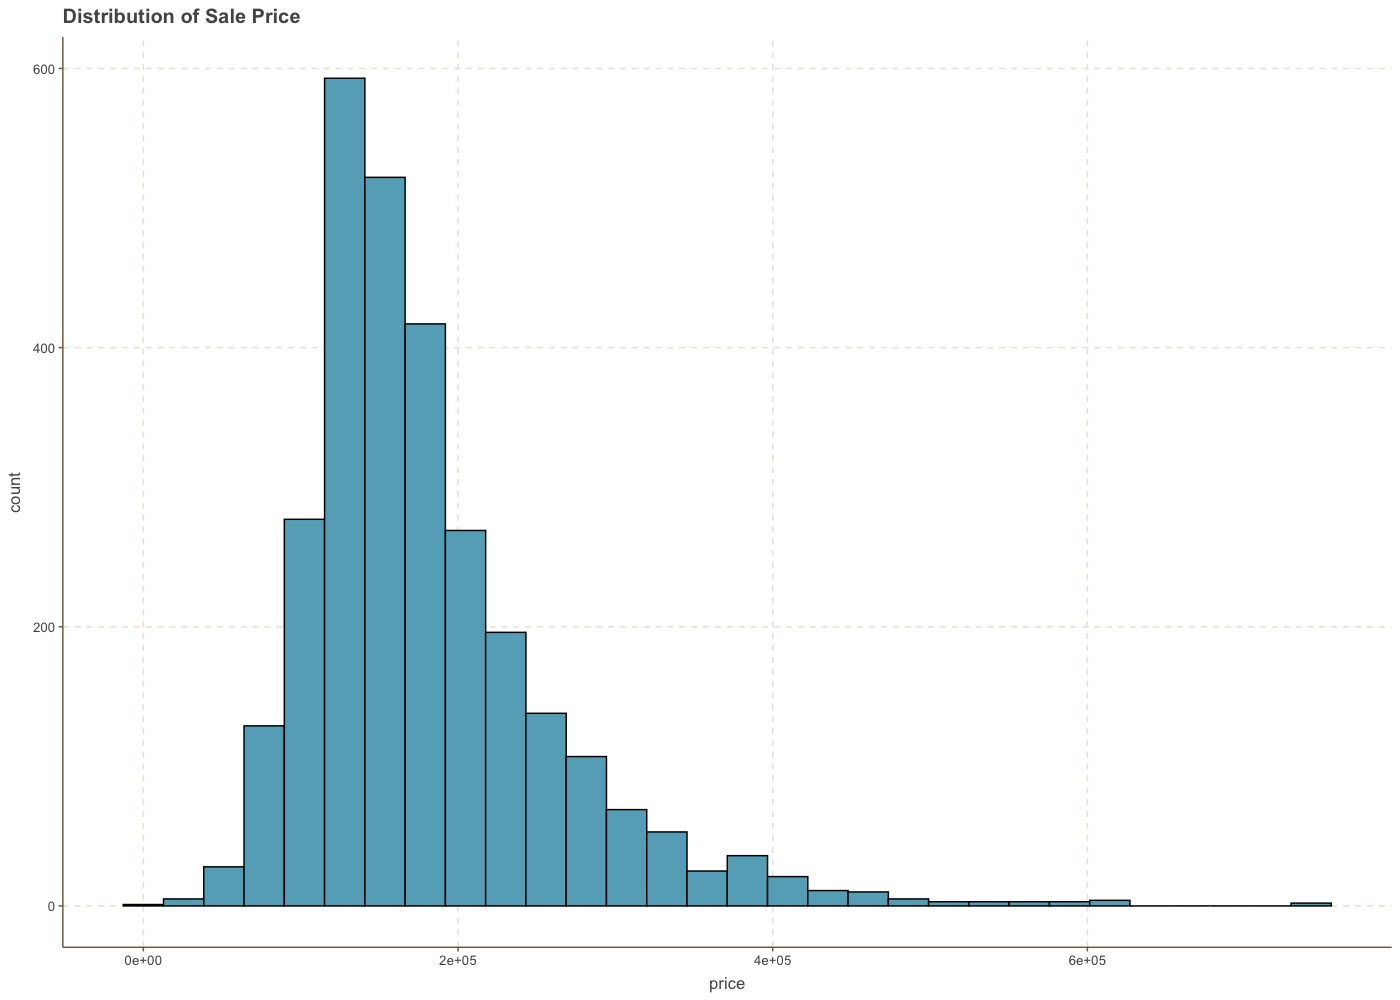

In [ ]:
options(repr.plot.width = 14, repr.plot.height = 10, repr.plot.res = 100)

ames %>%
  ggplot(., aes(x = price)) +
  geom_histogram( color = 'black', bins = 30 ) +
  ggtitle("Distribution of Sale Price")

What do we notice about the distribution?

1.  Is there a skew in the distribution? Yes, we see a right skew in the distribution.
2.  Why is this an interesting observation? Well, if we intend to use linear regression, there is an implicit assumption that the errors are normally distributed and therefore, there is an expectation that the response variable is also normally distributed.
3.  What can we do? Let's try a log transformation.

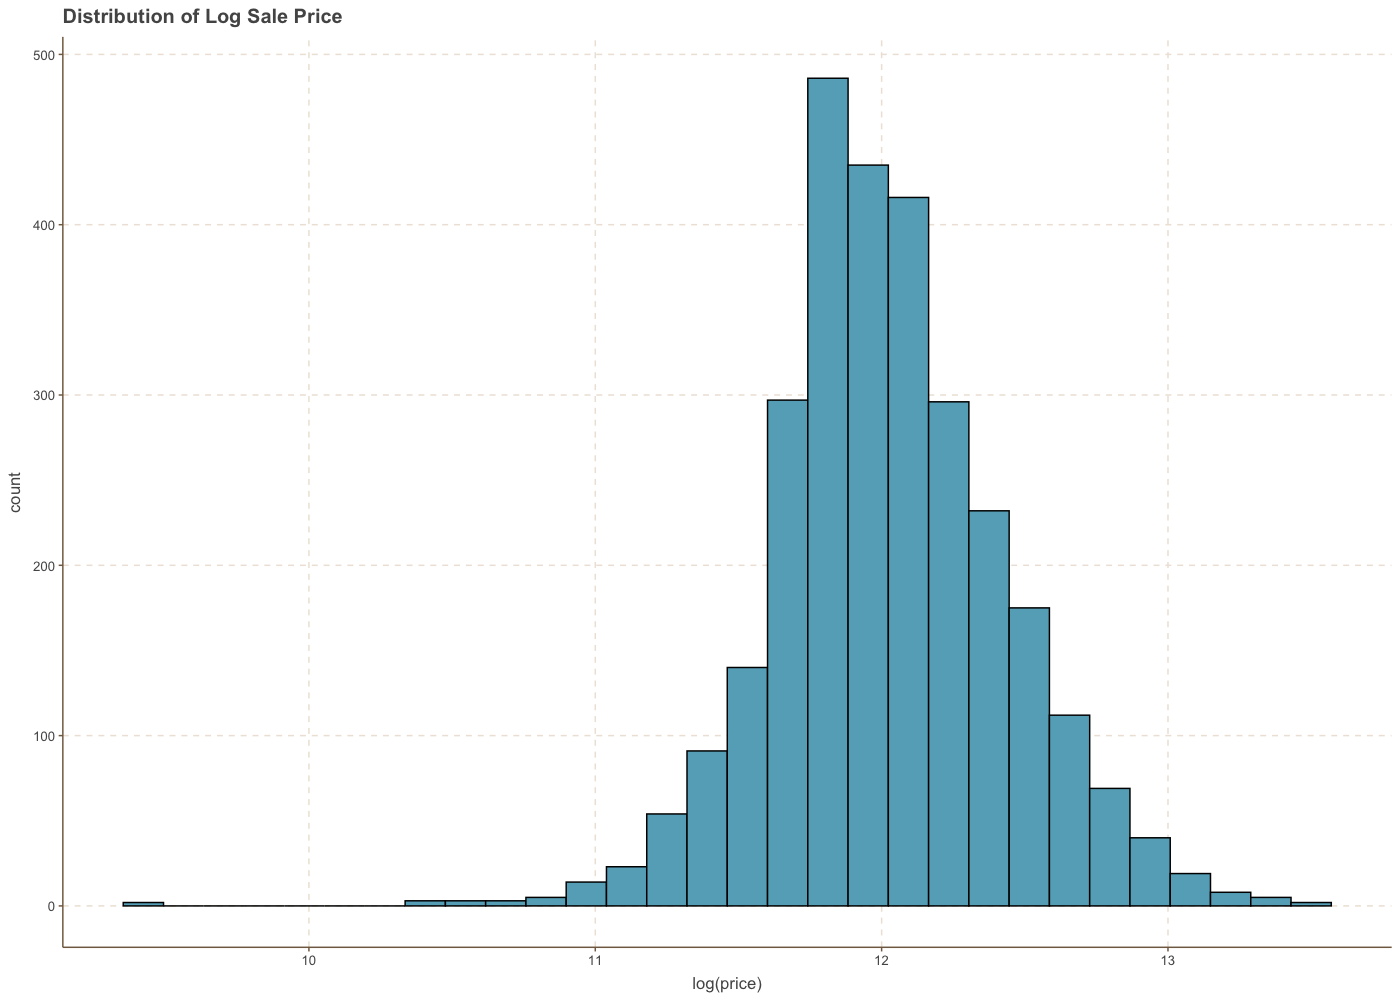

In [ ]:
ames %>%
  ggplot(., aes(x = log(price))) +
  geom_histogram( color = 'black', bins = 30 ) +
  ggtitle("Distribution of Log Sale Price")

We notice that the data is much closer to a normal distribution now however, we see that the log transformation has introduced a left skew.

<br>

## Box-Cox Transformation

Another alternative is the Box-Cox Transformation which aims to achieve similar results as the log transformation but converting the data into a normal distribution. The Box-Cox transformation is particularly useful with non-normal data. The formal definition is given as:

<br>

$$ Y(\lambda) =

\begin{cases}
\frac{Y^\lambda - 1}{\lambda} & \text{if } \lambda \neq 0 \\
\ln(Y) & \text{if } \lambda = 0
\end{cases}

$$

<br>

where $\lambda$ is a parameter that is estimated from the data, determining the exact nature of the transformation. The Box-Cox transformation adjusts the data such that it approximates a normal distribution, which is beneficial for many statistical modeling techniques that assume normality of the input data.

Let's see how to implement it. We first compute the lambda parameter and transform the variable with the function above.

In [ ]:
library(forecast)

# computing the lambda parameter
boxcox_lambda <- BoxCox.lambda(ames$price)
boxcox_lambda

ERROR: Error in library(forecast): there is no package called 'forecast'


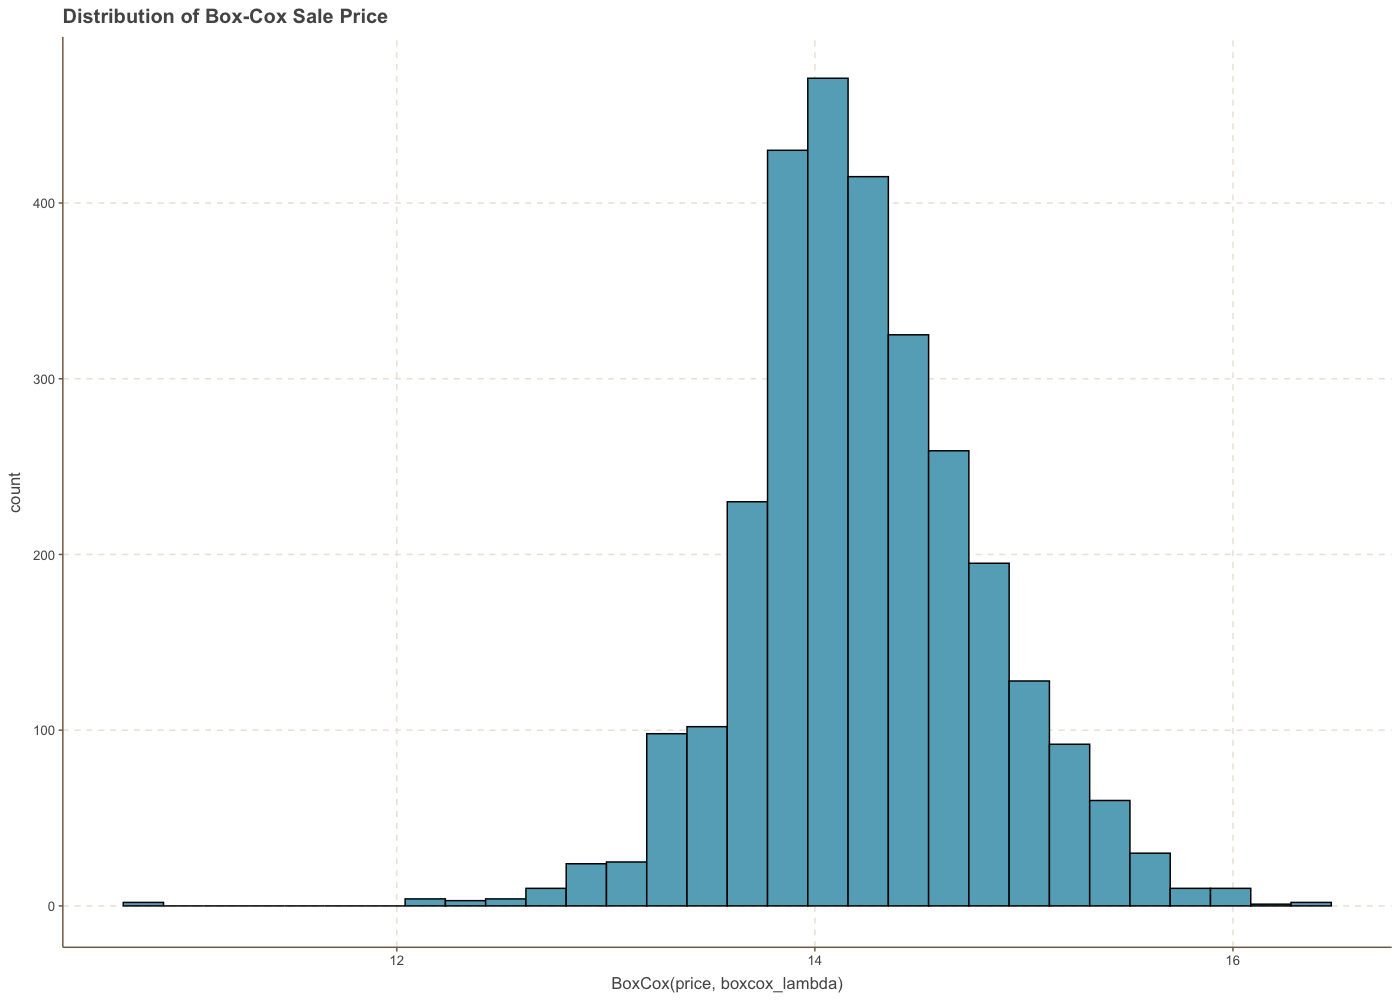

In [ ]:
ames %>%
  ggplot(., aes(x = BoxCox(price, boxcox_lambda))) +
  geom_histogram( color = 'black', bins = 30 ) +
  ggtitle("Distribution of Box-Cox Sale Price")

<br>

## Missing Values

A common and crucial preprocessing step in data analytics is dealing with missing values. These gaps in the data can arise due to various reasons, such as technical glitches or human errors during data collection. Addressing the missing value problem involves making decisions that balance acquiring useful information from incomplete observations and potentially introducing bias into the dataset. Properly handling missing values ensures the integrity and reliability of the analysis, helping to draw accurate and meaningful insights.

First, here is how we may be able to identify missing data


In [ ]:
sum(is.na(ames))

[1] 13960

In [ ]:
ames %>% summarise_all(~sum(is.na(.))) %>% glimpse()

Rows: 1
Columns: 82
$ Order           <int> 0
$ PID             <int> 0
$ area            <int> 0
$ price           <int> 0
$ MS.SubClass     <int> 0
$ MS.Zoning       <int> 0
$ Lot.Frontage    <int> 490
$ Lot.Area        <int> 0
$ Street          <int> 0
$ Alley           <int> 2732
$ Lot.Shape       <int> 0
$ Land.Contour    <int> 0
$ Utilities       <int> 0
$ Lot.Config      <int> 0
$ Land.Slope      <int> 0
$ Neighborhood    <int> 0
$ Condition.1     <int> 0
$ Condition.2     <int> 0
$ Bldg.Type       <int> 0
$ House.Style     <int> 0
$ Overall.Qual    <int> 0
$ Overall.Cond    <int> 0
$ Year.Built      <int> 0
$ Year.Remod.Add  <int> 0
$ Roof.Style      <int> 0
$ Roof.Matl       <int> 0
$ Exterior.1st    <int> 0
$ Exterior.2nd    <int> 0
$ Mas.Vnr.Type    <int> 0
$ Mas.Vnr.Area    <int> 23
$ Exter.Qual      <int> 0
$ Exter.Cond      <int> 0
$ Foundation      <int> 0
$ Bsmt.Qual       <int> 79
$ Bsmt.Cond       <int> 79
$ Bsmt.Exposure   <int> 79
$ BsmtFin.Type.1  <int> 79
$ BsmtFi

We can also visualize missing values at the feature/column level. A package `visdat` has a useful feature to put missing values by feature into context.

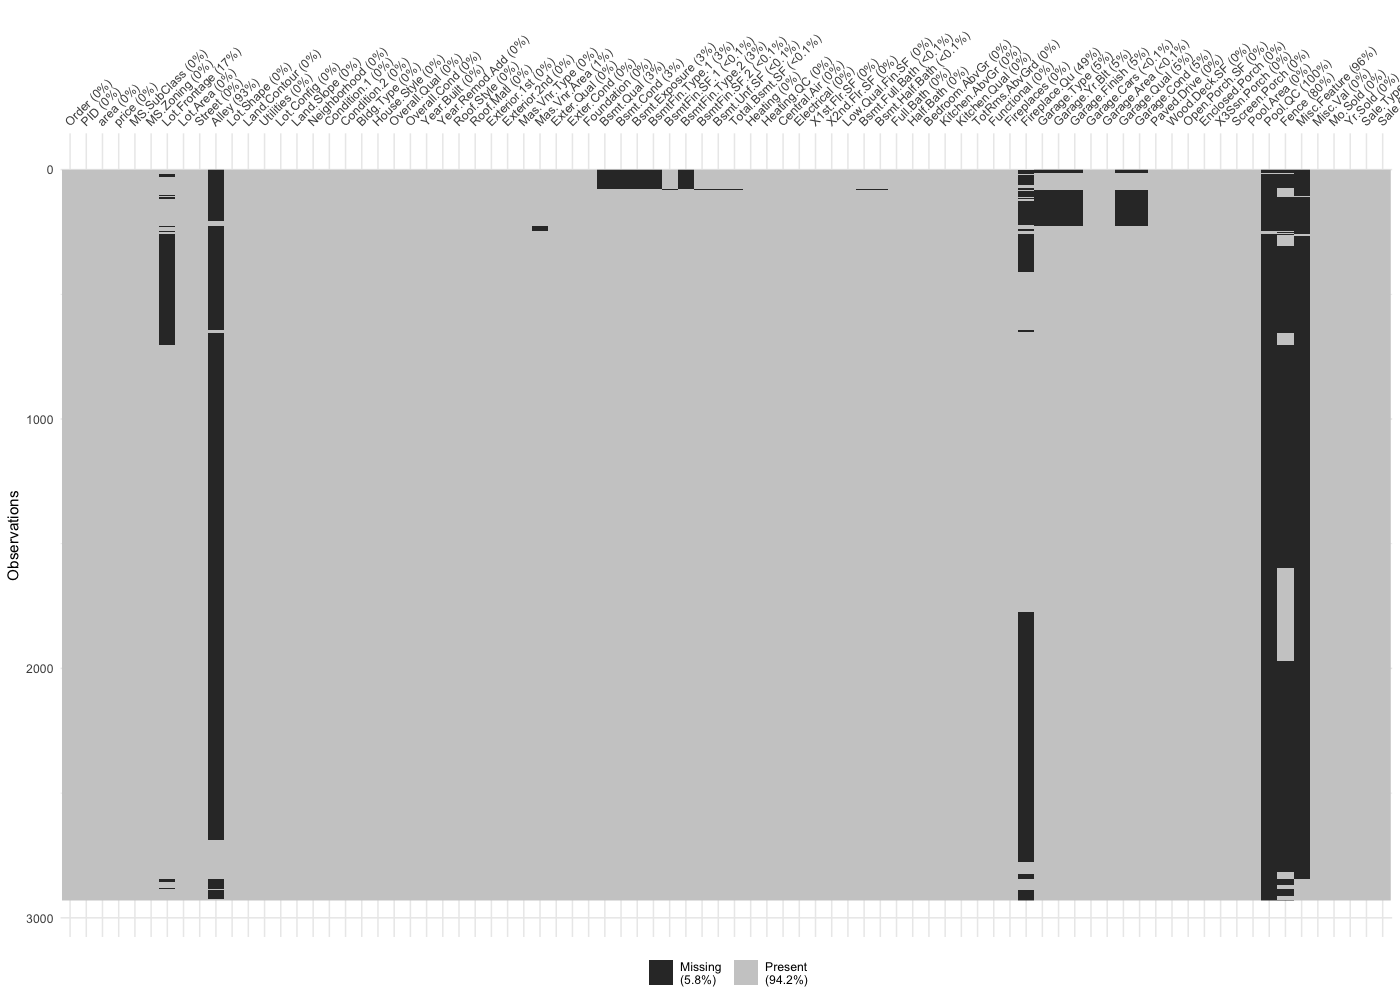

In [ ]:
library(visdat)

vis_miss(ames, cluster = TRUE)

<br>

## Recipes and Data Imputation

There are many ways to deal with missing data. In some cases, it may be reasonable to do away completely with missing observations. In many cases, imputing techniques can greatly enrich the dataset, preserving a proportion of the data that would otherwise not be regarded.

In this section, we explore a few techniques that can provide imputing facilities. But before we do that, we briefly have to introduce `recipes`.

## Tidy Recipes

The `recipes` library is part of the \`tidyverse\` ecosystem, providing various preprocessing functions that integrate seamlessly with the modeling facilities available within the `tidymodels` framework. Since these labs focus heavily on `tidymodels`, it is useful to provide a brief introduction here. In the next lab, we will introduce modeling with \`tidymodels\` more comprehensively. For more details, visit [recipes.tidymodels.org](%5Bhttps://recipes.tidymodels.org/index.html).](<https://recipes.tidymodels.org/index.html>).)

To demonstrate the range of imputation techniques available in \`recipes\`, see the list below.

In [ ]:
library(recipes)

grep("impute_", ls("package:recipes"), value = TRUE)


Attaching package: 'recipes'


The following object is masked from 'package:stringr':

    fixed


The following object is masked from 'package:stats':

    step




[1] "step_impute_bag"    "step_impute_knn"    "step_impute_linear"
[4] "step_impute_lower"  "step_impute_mean"   "step_impute_median"
[7] "step_impute_mode"   "step_impute_roll"

<br>

### Defining a Recipe

In order to use recipes to perform imputation, we must first define the recipe. The most straight forward way to achieve this is using the formula method.

In [ ]:
ames_recipe <- recipe(price ~ ., data = ames)

Once we have the recipe defined, imputation is as easy as adding the specific step to the recipe.

### Median Imputing

In the example below, we can impute using median value for missing value of a column. To do this, we simply add the function `step_impute_median()` to the recipe. The example below uses the variable `Lot.Frontage`

In [ ]:
ames_recipe %>% step_impute_median(Lot.Frontage )



-- Recipe ----------------------------------------------------------------------



-- Inputs 

Number of variables by role

outcome: <U+00A0><U+00A0><U+00A0>1
predictor: 81



-- Operations 

* Median imputation for: Lot.Frontage



<br>

### K-Nearest Neighbor Imputation

The K-nearest neighbor imputation is another effective impute function that can work for both numeric and non-numeric predictions. To apply this on all predictors, you can simply add `all_predictors` to the `step_impute_knn()` method.

In [ ]:
ames_recipe %>% step_impute_knn( Garage.Yr.Blt, neighbors = 5 )



-- Recipe ----------------------------------------------------------------------



-- Inputs 

Number of variables by role

outcome: <U+00A0><U+00A0><U+00A0>1
predictor: 81



-- Operations 

* K-nearest neighbor imputation for: Garage.Yr.Blt



Many More imputation methods exist and you may wish to explore them.

## Prep and Bake

Notice that the above imputation techniques only define the model or technique for imputation. In order to perform the imputation itself, we need two steps: `prep` and `bake`.

The prep step estimates the parameters necessary for imputation and the bake function implements the imputation.

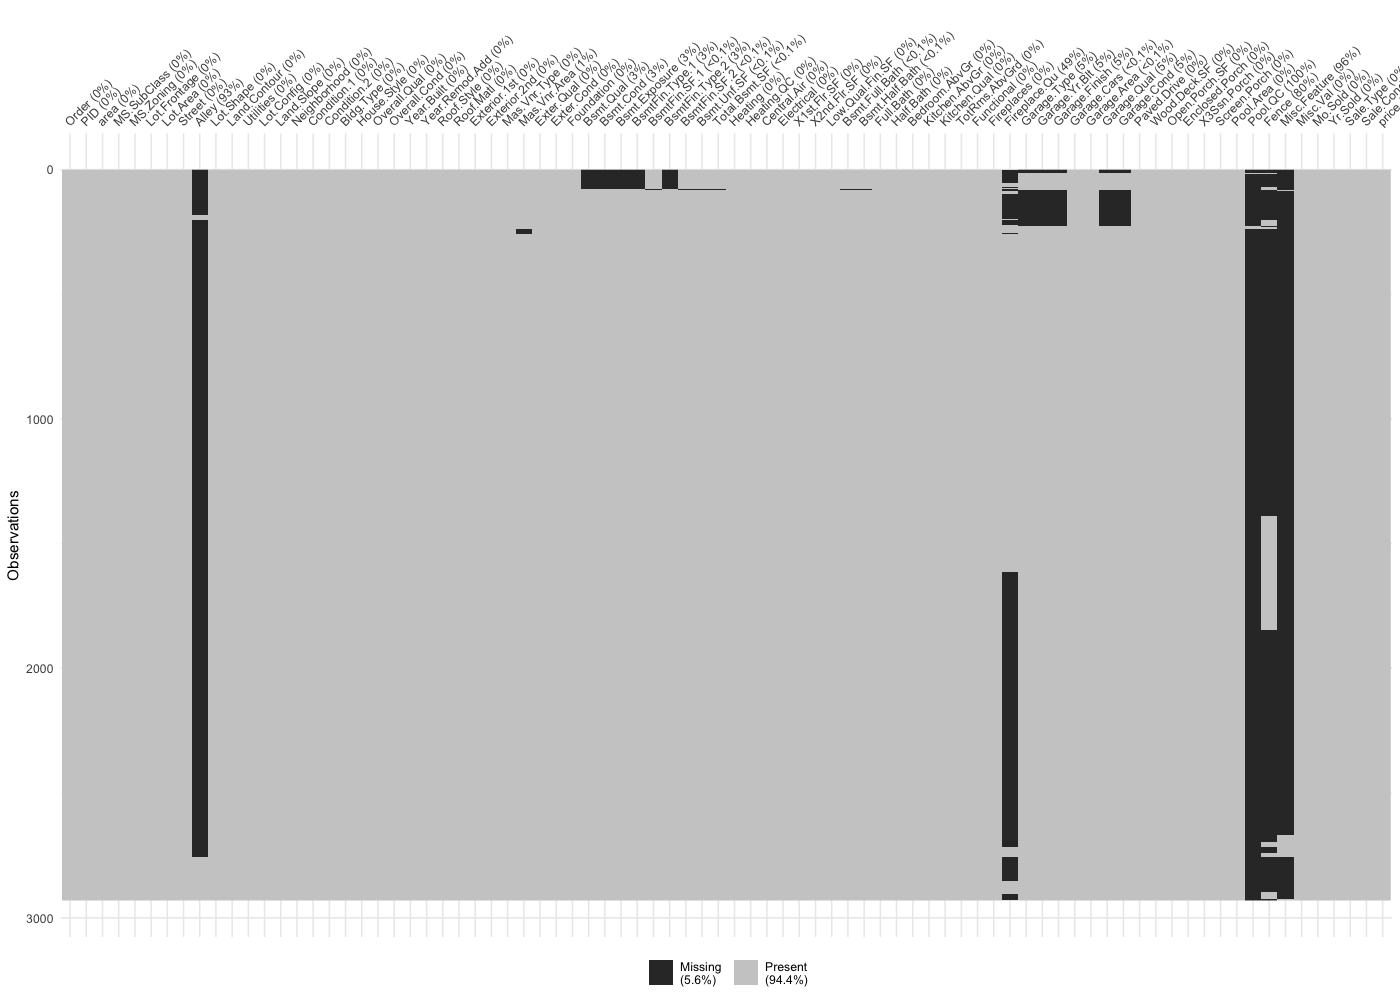

In [ ]:
sample_recipe <- recipe(price ~ ., data = ames) %>%
                   step_impute_median( Lot.Frontage )

impute_rec <- prep(sample_recipe, training = ames)

imputed_data <- bake(impute_rec, new_data = ames)

vis_miss(imputed_data, cluster = TRUE)

### Zero and Near Zero Variance Variables

Zero and Near Zero variance variables often pose a simple yet important preprocessing challenge because their limited variability typically translates into diminished predictive power. Consequently, these features can usually be removed from the dataset without compromising model performance. In fact, retaining them can sometimes lead to overfitting, as models become overly reliant on specific values or categories. For instance, zero-variance variables are essentially constant throughout the data, while near-zero variance variables tend to cluster around a single value.

The code below will show you how to identify these variables and consequently exclude them from your dataset.

In [ ]:
nzv_recipe <- recipe(price ~ ., data = ames) %>% step_nzv( all_predictors())

nzv_impute <- prep(nzv_recipe, ames)

filtered_ames <- bake(nzv_impute, ames)

dim(filtered_ames); dim(ames);

[1] 2930   61

[1] 2930   82

Notice that we have now moved from 82 columns to 61 columns.

## Normalization

In data preprocessing, normalization turns that dataset into the range between $0$ and $1$. This is achieved by subtracting the values of each observation by the minimun of the variable and scaling it by the range. Mathematically, this means:

$$ x_n = \frac {x - x_{min}} {x_{max} - X_{min} } $$


The implementation of this on recipes uses the function `step_range()`

In [ ]:
normalize <- recipe( price ~., data = ames) %>%
                step_range(Lot.Frontage, Lot.Area)

normalize_impute <- prep(normalize, ames)

normalized_data <- bake(normalize_impute,new_data = ames)

normalized_data %>% slice_head(n = 10)

Order,PID,area,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,price
<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,...,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>
1,526301100,1656,20,RL,0.41095890,0.14241978,Pave,NA,IR1,...,0,NA,NA,NA,0,5,2010,WD,Normal,215000
2,526350040,896,20,RH,0.20205479,0.04824604,Pave,NA,Reg,...,0,NA,MnPrv,NA,0,6,2010,WD,Normal,105000
3,526351010,1329,20,RL,0.20547945,0.06060904,Pave,NA,IR1,...,0,NA,NA,Gar2,12500,6,2010,WD,Normal,172000
4,526353030,2110,20,RL,0.24657534,0.04608661,Pave,NA,Reg,...,0,NA,NA,NA,0,4,2010,WD,Normal,244000
5,527105010,1629,60,RL,0.18150685,0.05856645,Pave,NA,IR1,...,0,NA,MnPrv,NA,0,3,2010,WD,Normal,189900
6,527105030,1604,60,RL,0.19520548,0.04056183,Pave,NA,IR1,...,0,NA,NA,NA,0,6,2010,WD,Normal,195500
7,527127150,1338,120,RL,0.06849315,0.01692024,Pave,NA,Reg,...,0,NA,NA,NA,0,4,2010,WD,Normal,213500
8,527145080,1280,120,RL,0.07534247,0.01731753,Pave,NA,IR1,...,0,NA,NA,NA,0,1,2010,WD,Normal,191500
9,527146030,1616,120,RL,0.06164384,0.01911239,Pave,NA,IR1,...,0,NA,NA,NA,0,3,2010,WD,Normal,236500


## Standardization

Standardization is a common data preprocessing technique used to transform variables to a common scale, making them more comparable and easier to interpret in statistical analyses. A typical standardization procedure aims to tranform the features into values with zero mean and constant variable. Specifically, this means using the formular:

$$ x_n = \frac {x - \mu}{\sigma} $$

where the $x_n$ is the standardized value.

The implementation of this using recipes can be seen below:

In [ ]:
standard_recipe <- recipe( price ~. , data = ames) %>%
                    step_center( all_numeric(), -all_outcomes())  %>% # get mean for all numeric predictors
                    step_scale( all_numeric(), -all_outcomes())

standard_impute <- prep(standard_recipe, ames)

standardized_data <- bake(standard_impute, new_data = ames)

standardized_data %>% slice_head(n = 10)

Order,PID,area,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,price
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,...,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<int>
-1.731164,-0.9969933,0.3092123,-0.8768552,RL,3.0718759,2.74391236,Pave,NA,IR1,...,-0.06302029,NA,NA,NA,-0.08940702,-0.44798097,1.678213,WD,Normal,215000
-1.729982,-0.9967340,-1.1942232,-0.8768552,RH,0.4611708,0.18706533,Pave,NA,Reg,...,-0.06302029,NA,MnPrv,NA,-0.08940702,-0.07958798,1.678213,WD,Normal,105000
-1.728800,-0.9967289,-0.3376606,-0.8768552,RL,0.5039692,0.52272448,Pave,NA,IR1,...,-0.06302029,NA,NA,Gar2,21.98197299,-0.07958798,1.678213,WD,Normal,172000
-1.727618,-0.9967182,1.2073172,-0.8768552,RL,1.0175506,0.12843602,Pave,NA,Reg,...,-0.06302029,NA,NA,NA,-0.08940702,-0.81637397,1.678213,WD,Normal,244000
-1.726436,-0.9927338,0.2558008,0.0612746,RL,0.2043801,0.46726775,Pave,NA,IR1,...,-0.06302029,NA,MnPrv,NA,-0.08940702,-1.18476697,1.678213,WD,Normal,189900
-1.725254,-0.9927337,0.2063456,0.0612746,RL,0.3755739,-0.02156364,Pave,NA,IR1,...,-0.06302029,NA,NA,NA,-0.08940702,-0.07958798,1.678213,WD,Normal,195500
-1.724072,-0.9926165,-0.3198568,1.4684693,RL,-1.2079686,-0.66344036,Pave,NA,Reg,...,-0.06302029,NA,NA,NA,-0.08940702,-0.81637397,1.678213,WD,Normal,213500
-1.722890,-0.9925215,-0.4345926,1.4684693,RL,-1.1223717,-0.65265359,Pave,NA,IR1,...,-0.06302029,NA,NA,NA,-0.08940702,-1.92155296,1.678213,WD,Normal,191500
-1.721708,-0.9925164,0.2300841,1.4684693,RL,-1.2935655,-0.60392273,Pave,NA,IR1,...,-0.06302029,NA,NA,NA,-0.08940702,-1.18476697,1.678213,WD,Normal,236500


## Yeo-Johnson Transformation

The Yeo-Johnson transformation is a statistical method used to transform continuous variables to make them more normally distributed. It's an extension of the Box-Cox transformation that can handle both positive and negative values, making it more versatile

The code below implements how we can generate a Yeo-Johnson Transformation. For this case, we simply apply it to all numeric data.

In [ ]:
yeo_johnson_recipe <- recipe(price ~ ., data = ames) %>%
                        step_YeoJohnson( all_numeric_predictors() )

yeo_johnson_impute <- prep(yeo_johnson_recipe, ames)

transformed_data <- bake(yeo_johnson_impute, new_data = ames)

Warning message in optimize(yj_obj, interval = limits, maximum = TRUE, dat = dat, :
"NA/Inf replaced by maximum positive value"


In [ ]:
transformed_data %>% head()

Order,PID,area,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,price
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,...,<int>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<int>
0.8952808,3.274457,6.999210,2.211743,RL,21.97759,21.82252,Pave,NA,IR1,...,0,NA,NA,NA,0.0000000,3.755019,0.3317081,WD,Normal,215000
1.6634209,3.274457,6.450050,2.211743,RH,16.09159,18.21764,Pave,NA,Reg,...,0,NA,MnPrv,NA,0.0000000,4.374913,0.3317081,WD,Normal,105000
2.3591257,3.274457,6.803107,2.211743,RL,16.20331,18.91511,Pave,NA,IR1,...,0,NA,NA,Gar2,0.2338854,4.374913,0.3317081,WD,Normal,172000
3.0054952,3.274457,7.214449,2.211743,RL,17.49441,18.08185,Pave,NA,Reg,...,0,NA,NA,NA,0.0000000,3.107996,0.3317081,WD,Normal,244000
3.6150870,3.274460,6.984578,2.694034,RL,15.40634,18.80810,Pave,NA,IR1,...,0,NA,MnPrv,NA,0.0000000,2.426764,0.3317081,WD,Normal,189900
4.1957020,3.274460,6.970809,2.694034,RL,15.86607,17.71074,Pave,NA,IR1,...,0,NA,NA,NA,0.0000000,4.374913,0.3317081,WD,Normal,195500


As we did with the Box-Cox, the transformation will determine the best parameter and convert the data into a more normally distributed variable for all numerical variables present.

While we have not exhausted everything, this now concludes our session on data preprocessing. In the next sections, we will cover items including dealing with dummy variable.

### References:

1. https://www.tidymodels.org/start/recipes/
2. https://recipes.tidymodels.org
